# Models

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pingouin as pg


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }




In [3]:
df = pd.read_csv('../data/3-oro/Merge_2019_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467110 entries, 0 to 467109
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 117.6+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,99,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,100,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


In [6]:
df["POB_VICT_CONF"].value_counts()

99    450622
1      14998
9        950
3        247
2        109
4        101
10        74
20         5
17         2
6          1
18         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1 : 1,
    9 : 1,
    3 : 1,
    2 : 1,
    4 : 1,
    10 : 1,
    20 : 1,
    17 : 1,
    6: 1,
    18: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

## Initial Variables

In [9]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE'

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [10]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.423956
3    0.383991
4    0.136013
1    0.056040
Name: NIVEL, dtype: float64

In [11]:
df = df[(df['NIVEL']== 4)]

In [12]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    1.0
Name: CODIGO_METODOLOGIA, dtype: float64

In [13]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Dependent$$
$$ H_{a}: The \: variables \:are \: not \: Dependent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [14]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
            Category       p-value
3  DIR_NUM_LOCALIDAD  3.129033e-42
0             GENERO  6.467583e-16
2     CODIGO_JORNADA  8.954699e-08
1      POB_VICT_CONF  2.580358e-03
4         tiene_auto  2.806836e-02


In [15]:
categorias = cat_dep

In [16]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


# Univariate Feature Selection for continous data
## Difference in means test 
### Part I: Features with dependence against REPITENTE

In [17]:
differentMean = pd.DataFrame(columns = ['numeric', 'p-value'])
cat_con = []
p_valuesc = []

for i in variables:
    df_r = df[df["REPITENTE"] == 1][i]
    df_nr = df[df["REPITENTE"] == 0][i]
    p_val = float(pg.ttest(df_r,df_nr)["p-val"][0])
    
    if p_val <= 0.05:
        cat_con.append(i)
        p_valuesc.append(p_val)
        
print('Dependent variables that reject H0 at a significance level of 5%')
differentMean['numeric'] = cat_con
differentMean['p-value'] = p_valuesc
print(differentMean.sort_values(by = 'p-value'))

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dependent variables that reject H0 at a significance level of 5%
                    numeric       p-value
0                      EDAD  5.698316e-15
2         ALUMN_POR_DOCENTE  6.141301e-07
1          puntaje_sisben_3  4.686232e-05
4              promepuntaje  5.328001e-05
3  PROP_DOCENTES_CON_TITULO  3.700977e-03


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

### Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.

**Box- Tidwell Test**

In [18]:
y = df['REPITENTE']
y.shape

(63533,)

In [19]:
X = df[variables]
X.shape

(63533, 10)

In [20]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

<ipython-input-21-a73a6ccc77d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [22]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [23]:
X_cons = sm.add_constant(X, prepend=False)

In [24]:
## Should not print anything
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [25]:
## Shouel not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [26]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                            GLM   Df Residuals:                    63512
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6593.8
Date:                Mon, 04 Jul 2022   Deviance:                       13188.
Time:                        19:24:57   Pearson chi2:                 6.28e+04
No. Iterations:                     7   Pseudo R-squ. (CS):           0.003426
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        6.9892      2.265      3.085      0.002       2.550      11.429
estrato                                                     0.6051      0.356      1.700      0.089      -0.092       1.302
puntaje_sisben_3                                            0.0240      0.036      0.661      0.509      -0.047       0.095
indice_hacinamiento                                         0.0312      0.152      0.206      0.837      -0.266       0.329
TOTAL_EQUIPO_COMPUTO                                        0.0080      0.003      2.434      0.015       0.002       0.014
ALUMN_POR_DOCENTE                                           0.3907      0.191      2.042      0.041       0.016       0.766
COMPU_POR_ALUMN                                             0.0549      0.262      0.209      0.834      -0.460       0.569
TOTAL_DOCENTES_CON_TITULO                                  -0.0505      0.009     -5.355      0.000      -0.069      -0.032
PROP_DOCENTES_CON_TITULO                                    0.6200      0.197      3.150      0.002       0.234       1.006
promepuntaje                                                1.0310      0.367      2.813      0.005       0.313       1.749
EDAD:Log_EDAD                                              -1.7881      0.596     -3.001      0.003      -2.956      -0.620
estrato:Log_estrato                                        -0.2820      0.214     -1.317      0.188      -0.702       0.138
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0061      0.008     -0.789      0.430      -0.021       0.009
indice_hacinamiento:Log_indice_hacinamiento                 0.0038      0.066      0.057      0.954      -0.126       0.134
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0011      0.000     -2.365      0.018      -0.002      -0.000
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.0855      0.045     -1.888      0.059      -0.174       0.003
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         0.4024      0.461      0.873      0.383      -0.501       1.306
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0092      0.002      5.259      0.000       0.006       0.013
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -3.2142      0.443     -7.263      0.000      -4.082      -2.347
promepuntaje:Log_promepuntaje                              -0.1584      0.056     -2.826      0.005      -0.268      -0.049
const                                                     -79.9817     17.233     -4.641      0.000    -113.757     -46.206
===========================================================================================================

In [27]:
logit_results.pvalues

EDAD                                                       2.032136e-03
estrato                                                    8.903970e-02
puntaje_sisben_3                                           5.086301e-01
indice_hacinamiento                                        8.369215e-01
TOTAL_EQUIPO_COMPUTO                                       1.492549e-02
ALUMN_POR_DOCENTE                                          4.117625e-02
COMPU_POR_ALUMN                                            8.344222e-01
TOTAL_DOCENTES_CON_TITULO                                  8.555262e-08
PROP_DOCENTES_CON_TITULO                                   1.633227e-03
promepuntaje                                               4.911344e-03
EDAD:Log_EDAD                                              2.693504e-03
estrato:Log_estrato                                        1.879777e-01
puntaje_sisben_3:Log_puntaje_sisben_3                      4.302086e-01
indice_hacinamiento:Log_indice_hacinamiento                9.541

In [28]:
logit_results.pvalues[logit_results.pvalues > 0.05]

estrato                                        0.089040
puntaje_sisben_3                               0.508630
indice_hacinamiento                            0.836922
COMPU_POR_ALUMN                                0.834422
estrato:Log_estrato                            0.187978
puntaje_sisben_3:Log_puntaje_sisben_3          0.430209
indice_hacinamiento:Log_indice_hacinamiento    0.954190
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE        0.059088
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN            0.382773
dtype: float64

In [29]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['estrato', 'puntaje_sisben_3', 'indice_hacinamiento', 'COMPU_POR_ALUMN',
       'estrato:Log_estrato', 'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE',
       'COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN'],
      dtype='object')

In [30]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['estrato',
 'puntaje_sisben_3',
 'indice_hacinamiento',
 'ALUMN_POR_DOCENTE',
 'COMPU_POR_ALUMN']

In [31]:
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [32]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [33]:
X_cons['REPITENTE'] = y

In [34]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN)'

In [35]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.105086
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                          Logit   Df Residuals:                    63522
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                0.003940
Time:                        19:24:58   Log-Likelihood:                -6676.4
converged:                       True   LL-Null:                       -6702.8
Covariance Type:            nonrobust   LLR p-value:                 8.027e-08
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -7.1434      1.208     -5.911      0.000      -9.512      -4.775
estrato                                             0.5596      0.353      1.584      0.113      -0.133       1.252
estrato:np.log(estrato)                            -0.3061      0.213     -1.435      0.151      -0.724       0.112
puntaje_sisben_3                                    0.0258      0.036      0.710      0.478      -0.045       0.097
puntaje_sisben_3:np.log(puntaje_sisben_3)          -0.0067      0.008     -0.873      0.383      -0.022       0.008
indice_hacinamiento                                 0.0227      0.150      0.151      0.880      -0.272       0.317
indice_hacinamiento:np.log(indice_hacinamiento)     0.0083      0.065      0.127      0.899      -0.120       0.137
ALUMN_POR_DOCENTE                                   0.3156      0.181      1.746      0.081      -0.039       0.670
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)        -0.0666      0.043     -1.556      0.120      -0.151       0.017
COMPU_POR_ALUMN                                     0.2329      0.192      1.213      0.225      -0.144       0.609
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            -0.2593      0.355     -0.730      0.465      -0.956       0.437
===================================================================================================================
"""

In [36]:
model.pvalues[model.pvalues > 0.05]

estrato                                            0.113196
estrato:np.log(estrato)                            0.151247
puntaje_sisben_3                                   0.477802
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.382871
indice_hacinamiento                                0.879827
indice_hacinamiento:np.log(indice_hacinamiento)    0.898929
ALUMN_POR_DOCENTE                                  0.080870
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)        0.119632
COMPU_POR_ALUMN                                    0.225276
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            0.465374
dtype: float64

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same reference as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [37]:
all_variables = variables + categorias
y = df['REPITENTE']
X = df[all_variables]


In [38]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                            GLM   Df Residuals:                    63523
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6837.9
Date:                Mon, 04 Jul 2022   Deviance:                       13676.
Time:                        19:24:59   Pearson chi2:                 7.38e+04
No. Iterations:                     7   Pseudo R-squ. (CS):          -0.004262
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estrato                -0.2544      0.040     -6.433      0.000      -0.332      -0.177
puntaje_sisben_3       -0.0193      0.002    -11.310      0.000      -0.023      -0.016
indice_hacinamiento    -0.1630      0.023     -7.059      0.000      -0.208      -0.118
ALUMN_POR_DOCENTE      -0.0698      0.005    -14.854      0.000      -0.079      -0.061
COMPU_POR_ALUMN        -1.5383      0.206     -7.469      0.000      -1.942      -1.135
GENERO                  0.3062      0.053      5.812      0.000       0.203       0.409
POB_VICT_CONF           0.2690      0.131      2.059      0.040       0.013       0.525
CODIGO_JORNADA          0.0045      0.015      0.294      0.769      -0.025       0.034
DIR_NUM_LOCALIDAD      -0.0242      0.005     -4.870      0.000      -0.034      -0.014
tiene_auto             -0.2147      0.192     -1.120      0.263      -0.590       0.161
=======================================================================================
"""

In [39]:
# Get influence measures
influence = logit_results.get_influence()

In [40]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [41]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-41-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-41-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [42]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [43]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
334556,0.006275,9.469299
84491,0.005963,8.058445
292169,0.005150,5.374907
84684,0.004710,11.544664
84455,0.004546,8.768412


In [44]:
extreme.shape

(1392, 2)

In [45]:
extreme.index

Int64Index([   208,   2208,   2272,   2314,   4084,   6784,   6789,   6802,
              6818,   6832,
            ...
            450584, 450636, 450695, 451514, 451657, 455040, 455087, 455107,
            455615, 464865],
           dtype='int64', length=1392)

In [46]:
df.index

Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            467086, 467091, 467092, 467094, 467095, 467099, 467100, 467101,
            467107, 467109],
           dtype='int64', length=63533)

In [47]:
# Delete undesirable outliers
df = df.loc[~df.index.isin(extreme.index)]

In [48]:
df.index

Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            467086, 467091, 467092, 467094, 467095, 467099, 467100, 467101,
            467107, 467109],
           dtype='int64', length=62141)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-49-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


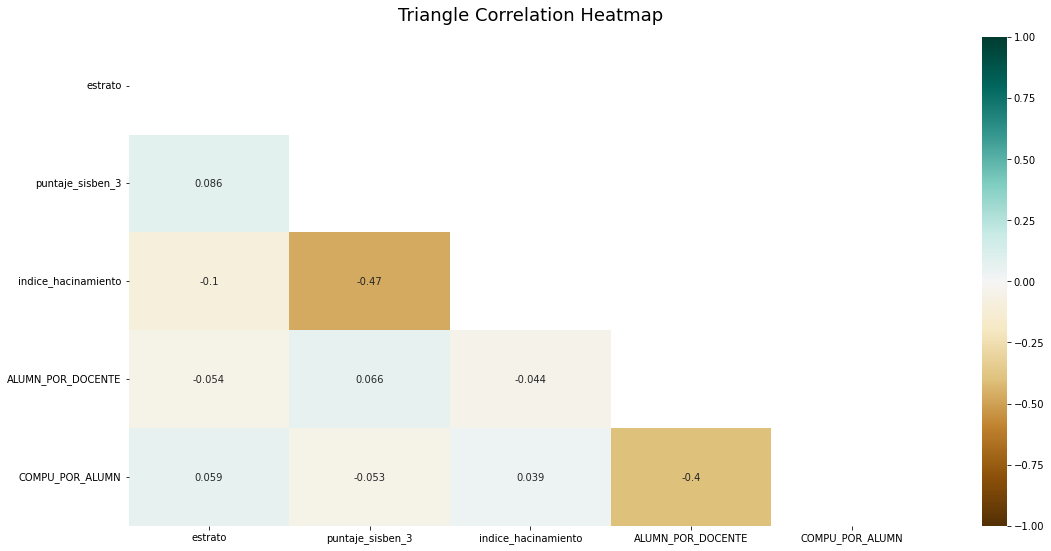

In [49]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,estrato,9.443763
1,puntaje_sisben_3,8.654258
2,indice_hacinamiento,5.458973
3,ALUMN_POR_DOCENTE,17.223782
4,COMPU_POR_ALUMN,2.597930


In [51]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >5
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [52]:
variables

['COMPU_POR_ALUMN', 'puntaje_sisben_3', 'estrato', 'indice_hacinamiento']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [53]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [54]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,2
1,POB_VICT_CONF,1
2,CODIGO_JORNADA,1
3,DIR_NUM_LOCALIDAD,0
4,tiene_auto,0


In [55]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,2,POB_VICT_CONF
1,POB_VICT_CONF,1,CODIGO_JORNADA
2,CODIGO_JORNADA,1,DIR_NUM_LOCALIDAD
3,DIR_NUM_LOCALIDAD,0,tiene_auto
4,tiene_auto,0,NaN


In [56]:
independent = independent.reset_index()

In [57]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [58]:
vals.append(1)

In [59]:
independent['p_values'] = vals

In [60]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,2,POB_VICT_CONF,9.397298e-01
1,1,POB_VICT_CONF,1,CODIGO_JORNADA,1.302226e-25
2,2,CODIGO_JORNADA,1,DIR_NUM_LOCALIDAD,0.000000e+00
3,3,DIR_NUM_LOCALIDAD,0,tiene_auto,2.440689e-67
4,4,tiene_auto,0,NaN,1.000000e+00


In [61]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

1


In [62]:
cat_iid

['GENERO', 'POB_VICT_CONF']

In [63]:
categorias = cat_iid

------------------

### Run Models

In [64]:
def formula_maker(dependiente, variables, categorias):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
    for categoria in categorias:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'C({categoria})'
    return formula  

In [65]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
model.summary()

         Current function value: 0.000104
         Iterations: 35


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                62141
Model:                          Logit   Df Residuals:                    62134
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.7147
Time:                        19:25:04   Log-Likelihood:                -6.4724
converged:                      False   LL-Null:                       -22.688
Covariance Type:            nonrobust   LLR p-value:                 1.349e-05
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -20.5696   4.75e+05  -4.33e-05      1.000    -9.3e+05     9.3e+05
C(GENERO)[T.1]           27.0556   4.75e+05    5.7e-05      1.000    -9.3e+05     9.3e+05
C(POB_VICT_CONF)[T.1]   -17.1580   2.83e+04     -0.001      1.000   -5.55e+04    5.55e+04
COMPU_POR_ALUMN           6.5184      3.343      1.950      0.051      -0.033      13.070
puntaje_sisben_3         -0.4618      0.263     -1.754      0.079      -0.978       0.054
estrato                  -4.5521      1.882     -2.418      0.016      -8.241      -0.863
indice_hacinamiento      -1.8421      1.652     -1.115      0.265      -5.081       1.397
=========================================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [66]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
model.summary()

         Current function value: 0.000176
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                62141
Model:                          Logit   Df Residuals:                    62134
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.5191
Time:                        19:25:06   Log-Likelihood:                -10.910
converged:                      False   LL-Null:                       -22.688
Covariance Type:            nonrobust   LLR p-value:                 0.0006301
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3087      4.410      0.070      0.944      -8.334       8.951
C(GENERO)[T.1]            1.0184      1.935      0.526      0.599      -2.775       4.812
C(POB_VICT_CONF)[T.1]    -0.0381      4.229     -0.009      0.993      -8.327       8.251
COMPU_POR_ALUMN           0.6555      4.685      0.140      0.889      -8.526       9.837
puntaje_sisben_3         -0.2064      0.120     -1.723      0.085      -0.441       0.028
estrato                  -1.7692      1.472     -1.202      0.229      -4.653       1.115
indice_hacinamiento      -1.3880      1.238     -1.121      0.262      -3.815       1.039
=========================================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [67]:
all_vars = variables + categorias

In [68]:
X = df[all_vars]

In [69]:
X

,COMPU_POR_ALUMN,puntaje_sisben_3,estrato,indice_hacinamiento,GENERO,POB_VICT_CONF
0,0.568627,43.919998,3,2.500000,0,0
2,0.568627,46.810001,3,3.000000,0,0
3,0.568627,30.650000,3,4.000000,0,0
4,0.568627,60.119999,2,1.333008,0,0
5,0.568627,37.090000,3,1.666992,0,0
...,...,...,...,...,...,...
467099,0.166337,35.730000,1,4.000000,0,0
467100,0.166337,48.630001,1,1.333008,1,0
467101,0.166337,22.969999,1,2.000000,1,0
467107,0.166337,20.990000,1,6.000000,1,0


In [70]:
y = df['REPITENTE']
y

0         0
2         0
3         0
4         0
5         0
         ..
467099    0
467100    0
467101    0
467107    0
467109    0
Name: REPITENTE, Length: 62141, dtype: uint8

In [71]:
X = pd.get_dummies(X, columns=categorias, drop_first=True)
X.head(2)

,COMPU_POR_ALUMN,puntaje_sisben_3,estrato,indice_hacinamiento,GENERO_1,POB_VICT_CONF_1
0,0.568627,43.919998,3,2.5,0,0
2,0.568627,46.810001,3,3.0,0,0


In [72]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                62141
Model:                            GLM   Df Residuals:                    62135
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.4760
Date:                Mon, 04 Jul 2022   Deviance:                       12.952
Time:                        19:25:08   Pearson chi2:                     116.
No. Iterations:                    27   Pseudo R-squ. (CS):          0.0005216
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
COMPU_POR_ALUMN         6.5389      3.343      1.956      0.050      -0.013      13.091
puntaje_sisben_3       -0.4657      0.258     -1.807      0.071      -0.971       0.040
estrato                -4.5666      1.875     -2.436      0.015      -8.241      -0.892
indice_hacinamiento    -1.8674      1.608     -1.161      0.246      -5.019       1.284
GENERO_1                6.5888      5.618      1.173      0.241      -4.422      17.600
POB_VICT_CONF_1       -16.4970   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
=======================================================================================
"""

In [73]:
variables

['COMPU_POR_ALUMN', 'puntaje_sisben_3', 'estrato', 'indice_hacinamiento']

In [74]:
categorias

['GENERO', 'POB_VICT_CONF']

### Conclusions